<u>**IMPORTING NECESARY PACKAGES**</u>

In [32]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [33]:
import numpy as np # import numpy for numeric calculations
import pandas as pd #import pandas for dataframe analysis
import os
from matplotlib.pyplot import Figure
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
from  sklearn.preprocessing import MinMaxScaler, LabelEncoder
import random as rd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,auc,roc_curve
from sklearn.ensemble import RandomForestClassifier

In [35]:
from pprint import pprint
import warnings
import pickle
warnings.filterwarnings('ignore')
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.utils import class_weight
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from mpl_toolkits import mplot3d
sns.set_theme(style="darkgrid", palette='dark',font='serif')
color = sns.color_palette('dark')

In [36]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [37]:
import math

DEFINING NECESSARY FUNCTIONS FOR EDA

In [38]:
def plot_categorical_piecharts(data):
    '''
    This function plots categorical variables as pie charts.
    '''
    cat_col = data.select_dtypes(include=['object']).columns
    num_cat_col = len(cat_col)
    
    # Define a grid for subplots
    rows = math.ceil(num_cat_col / 4)
    cols = min(4, num_cat_col)
    
    # Create a color palette
    color_palette = plt.cm.Paired(range(num_cat_col))
    
    fig, axes = plt.subplots(rows, cols, figsize=(16, 4 * rows))
    fig.suptitle('Column Distribution', y=1.05, ha='center', size=15, weight='bold')
    
    for i, col in enumerate(cat_col):
        ax = axes[i // cols, i % cols]
        count = data[col].value_counts()
        explode = [0.05 if i == 0 else 0 for i in range(len(count))]
        
        count.plot.pie(
            colors=color_palette,
            autopct='%0.0f%%',
            explode=explode,
            shadow=True,
            startangle=40,
            textprops={'color': 'white', 'fontsize': 12},
            wedgeprops={'linewidth': 3, 'edgecolor': 'grey'},
            rotatelabels=True,
            ax=ax
        )
        
        ax.grid(True)
        ax.set_title(col)
    
    # Hide any empty subplots
    for i in range(num_cat_col, rows * cols):
        fig.delaxes(axes[i // cols, i % cols])
    
    plt.tight_layout()
    plt.show()


In [39]:
def plot_categorical_barcharts(data, height=0.005):
    '''
    This function plots categorical variables as bar charts with the % weight of each value on the bar.
    '''
    cat_col = data.select_dtypes(include=['object']).columns
    num_cat_col = len(cat_col)
    
    # Define a color palette for the bar charts
    color_palette = sns.color_palette("Set3", num_cat_col)
    
    # Calculate the number of rows and columns for subplots
    rows = math.ceil(num_cat_col / 4)
    cols = min(4, num_cat_col)
    
    fig, axes = plt.subplots(rows, cols, figsize=(16, 4 * rows))
    fig.suptitle('Column Distribution', y=1.05, ha='center', size=15, weight='bold')
    
    for i, col in enumerate(cat_col):
        ax = axes[i // cols, i % cols]
        count = data[col].value_counts(normalize=True).reset_index()
        
        sns.barplot(data=count, x='index', y=col, ax=ax, edgecolor='white', linewidth=2, palette=color_palette[i:i+1])
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.set_title(col, size=15)
        ax.tick_params(axis='x', labelrotation=30, labelsize=12)
        
        for j in count.index:
            ax.text(x=j, y=count[col][j] + height, s=f'{count[col][j] * 100:.2f}%', ha="center", va="center", color="black", size=13)
    
    # Hide any empty subplots
    for i in range(num_cat_col, rows * cols):
        fig.delaxes(axes[i // cols, i % cols])
    
    plt.tight_layout()
    plt.show()

In [40]:
def plot_missing_values(data, height=0):
    '''
    This function plots missing values as bars and appends text of missing values on the bar.
    '''
    na_df = data.isna().sum().reset_index()
    na_df.columns = ['Columns', 'Missing Values']
    
    plt.figure(figsize=(16, 6))
    ax = sns.barplot(data=na_df, x='Columns', y='Missing Values', palette='Set2')
    ax.set(title='Plot Of Missing Values', xlabel='Columns', ylabel='Missing Values')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    
    for i, row in na_df.iterrows():
        ax.text(x=i, y=row['Missing Values'] + height, s=row['Missing Values'], ha="center", va="bottom", color="black", size=12)

    plt.show()

In [41]:
def plot_columns_strip(data):
    '''
    A strip plot that plots the columns with different colors.
    '''
    fig, ax = plt.subplots(figsize=(12, 10))
    column_names = data.columns
    num_columns = len(column_names)

    # Create a color palette with different colors
    color_palette = sns.color_palette('Set3', num_columns)

    sns.stripplot(data=pd.DataFrame({'Columns': column_names}), x=column_names, palette=color_palette, ax=ax, size=10)
    ax.set_xticklabels(column_names, rotation=60, ha='right')
    ax.set_xlabel('Columns')
    ax.set_title('Plot Of Columns', y=1.02, ha='center', size=15, weight='bold')

    plt.tight_layout()
    plt.show()

In [42]:
def plot_target_column(data, col):
    '''
    This function plots the target column with distributions as both pie and bar charts.
    '''
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Define different color palettes for pie chart and bar chart
    pie_chart_colors = ['lightcoral', 'lightskyblue']
    bar_chart_colors = ['darkred', 'dodgerblue']
    
    # Plot pie chart
    data[col].value_counts().plot.pie(
        autopct='%.2f%%',
        explode=[0, 0.05],
        ax=axes[0],
        colors=pie_chart_colors,
        shadow=True,
        startangle=40,
        textprops={'color': 'white', 'fontsize': 12},
        wedgeprops={'linewidth': 3, 'edgecolor': 'white'},
        rotatelabels=True
    )
    
    # Plot bar chart
    sns.countplot(data=data, x=col, ax=axes[1], palette=bar_chart_colors, edgecolor='white', linewidth=4)
    
    # Annotate bar chart with value counts
    for i, val_count in enumerate(data[col].value_counts()):
        axes[1].text(x=i, y=val_count + 500, s=val_count, color='white', va='center', ha='center', fontsize=12)
    
    # Set plot titles and labels
    fig.suptitle('Target Column Distribution', y=1.05, ha='center', size=15, weight='bold')
    axes[0].set_title('Pie Chart')
    axes[1].set_title('Bar Chart')
    
    plt.show()


In [43]:
def count_unique_values(data):
    """
    This function counts and prints unique values for all categorical columns in the DataFrame.
    """
    categorical_columns = data.select_dtypes(include=['object']).columns
    
    for col in categorical_columns:
        unique_values = data[col].value_counts()
        print(f"Column: {col}\n{unique_values}\n{'*' * 50}\n")

In [44]:
def replace_na(df):
    '''
    Replace null values in the dataset with the mode for each column.
    '''
    return df.fillna(df.mode().iloc[0])


In [45]:
def corrplot(data, labels=[]):
    '''
    This function plots a correlation plot of a dataset.
    '''
    # Create a correlation matrix for numeric columns
    corr_matrix = data.select_dtypes(include=['number']).corr()

    # Exclude specified labels, if provided
    if labels:
        corr_matrix = corr_matrix.drop(labels, axis=1).drop(labels, axis=0)

    # Set up the figure and plot the correlation matrix
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='RdYlBu', fmt='.2f', cbar=False)

    # Add a title
    plt.title('Correlation Plot of Numeric Columns')

    # Show the plot
    plt.show()

**DATAFRAME IMPORT**

In [46]:
loc = "/mnt/batch/tasks/shared/LS_root/mounts/clusters/hdhingra2/code/Users/HDhingra/Loan_Default/Loan_Default.csv"
df = pd.read_csv(loc)
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


**ANALYSIS**

In [47]:
# Create a Styler object with a different colormap and vmin value
styled_summary = df.describe().style.background_gradient(cmap='viridis', vmin=-1)

# Display the styled summary
styled_summary

,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
count,148670.000000,148670.000000,148670.000000,112231.000000,112031.000000,109028.000000,148629.000000,133572.000000,139520.000000,148670.000000,133572.000000,148670.000000,124549.000000
mean,99224.500000,2019.000000,331117.743997,4.045476,0.441656,3224.996127,335.136582,497893.465696,6957.338876,699.789103,72.746457,0.246445,37.732932
std,42917.476598,0.000000,183909.310127,0.561391,0.513043,3251.121510,58.409084,359935.315562,6496.586382,115.875857,39.967603,0.430942,10.545435
min,24890.000000,2019.000000,16500.000000,0.000000,-3.638000,0.000000,96.000000,8000.000000,0.000000,500.000000,0.967478,0.000000,5.000000
25%,62057.250000,2019.000000,196500.000000,3.625000,0.076000,581.490000,360.000000,268000.000000,3720.000000,599.000000,60.474860,0.000000,31.000000
50%,99224.500000,2019.000000,296500.000000,3.990000,0.390400,2596.450000,360.000000,418000.000000,5760.000000,699.000000,75.135870,0.000000,39.000000
75%,136391.750000,2019.000000,436500.000000,4.375000,0.775400,4812.500000,360.000000,628000.000000,8520.000000,800.000000,86.184211,0.000000,45.000000
max,173559.000000,2019.000000,3576500.000000,8.000000,3.357000,60000.000000,360.000000,16508000.000000,578580.000000,900.000000,7831.250000,1.000000,61.000000


In [48]:
count_unique_values(df)

Column: loan_limit
loan_limit
cf     135348
ncf      9978
Name: count, dtype: int64
**************************************************

Column: Gender
Gender
Male                 42346
Joint                41399
Sex Not Available    37659
Female               27266
Name: count, dtype: int64
**************************************************

Column: approv_in_adv
approv_in_adv
nopre    124621
pre       23141
Name: count, dtype: int64
**************************************************

Column: loan_type
loan_type
type1    113173
type2     20762
type3     14735
Name: count, dtype: int64
**************************************************

Column: loan_purpose
loan_purpose
p3    55934
p4    54799
p1    34529
p2     3274
Name: count, dtype: int64
**************************************************

Column: Credit_Worthiness
Credit_Worthiness
l1    142344
l2      6326
Name: count, dtype: int64
**************************************************

Column: open_credit
open_credit
nopc    148114
o

In [49]:
replace_na(df)

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,81.250000,North,direct,1,37.0
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,173555,2019,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,...,CIB,659,EXP,55-64,to_inst,71.792763,south,direct,0,48.0
148666,173556,2019,cf,Male,nopre,type1,p1,l1,nopc,nob/c,...,CIB,569,CIB,25-34,not_inst,74.428934,south,direct,0,15.0
148667,173557,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,CIB,702,EXP,45-54,not_inst,61.332418,North,direct,0,49.0
148668,173558,2019,cf,Female,nopre,type1,p4,l1,nopc,nob/c,...,EXP,737,EXP,55-64,to_inst,70.683453,North,direct,0,29.0


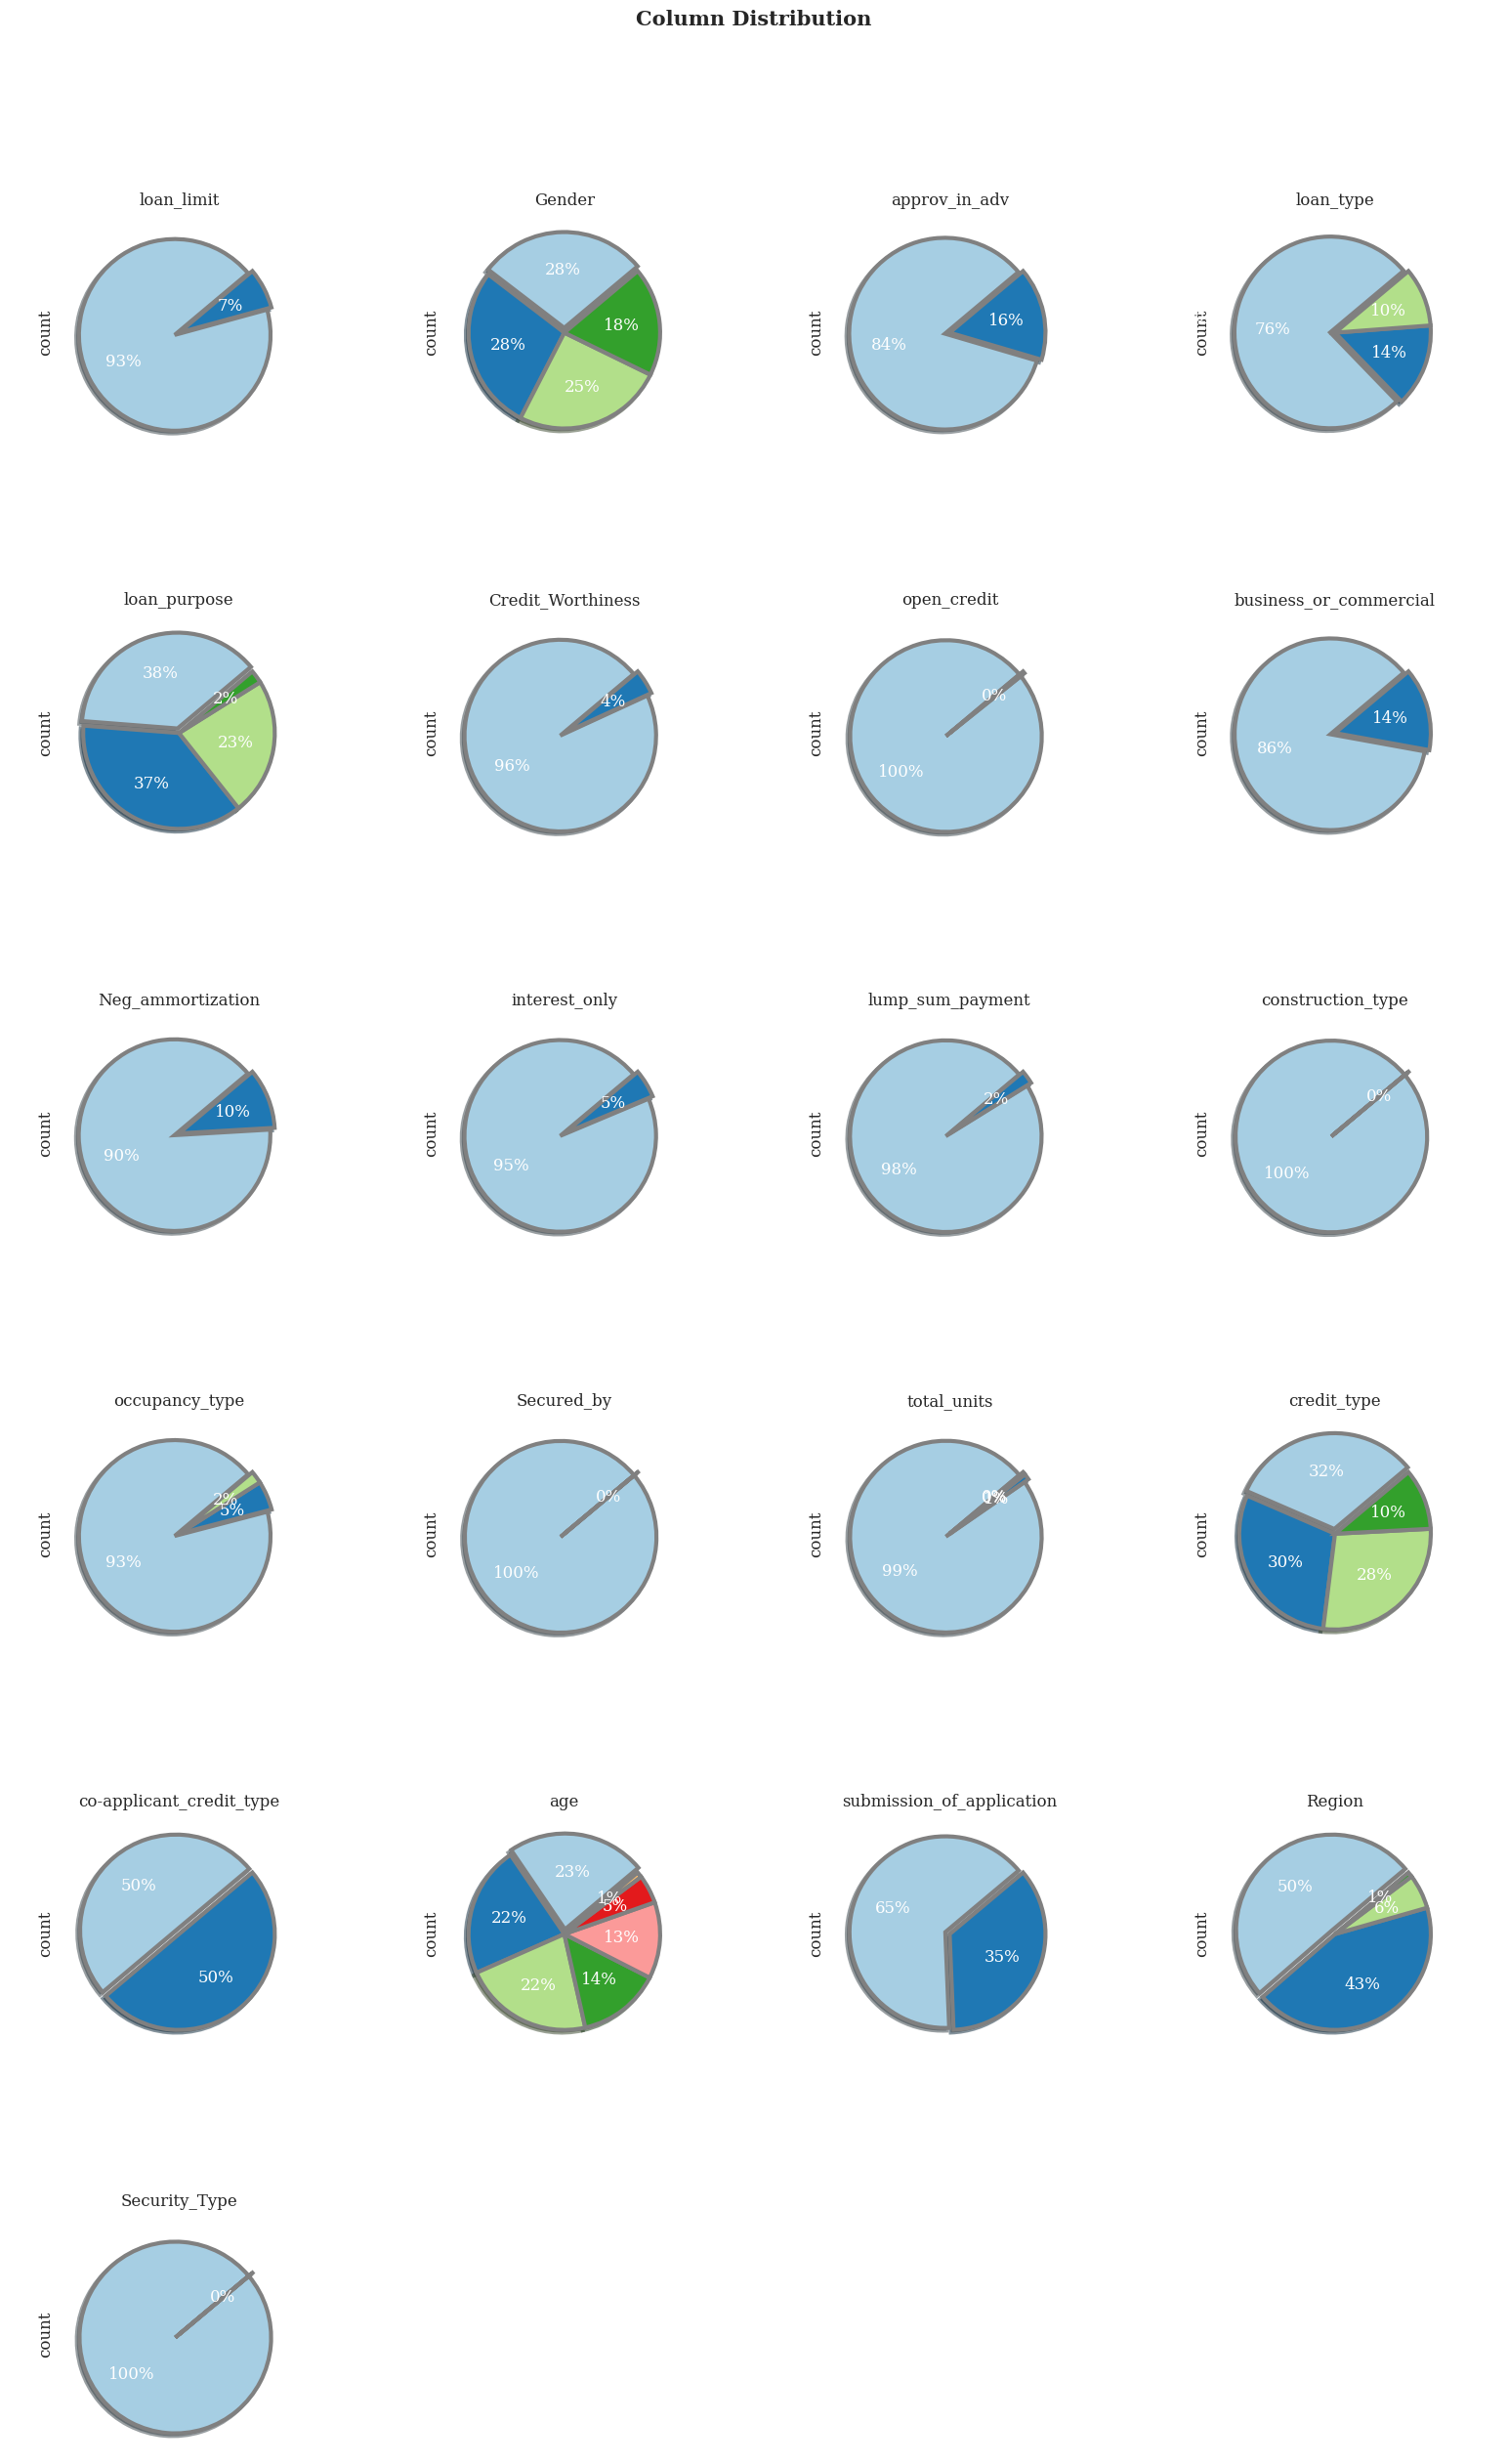

In [50]:
plot_categorical_piecharts(df)

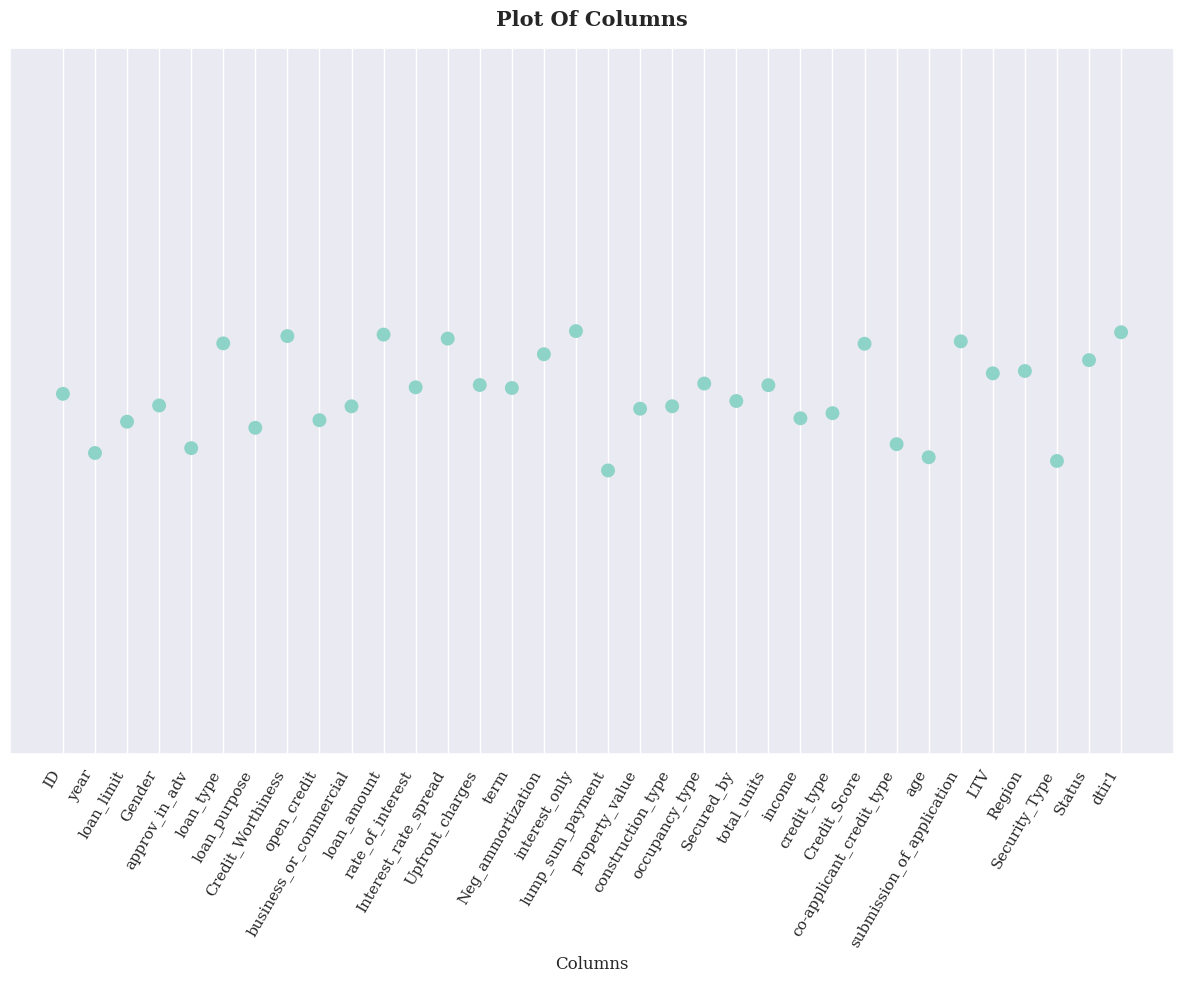

In [53]:
plot_columns_strip(df)

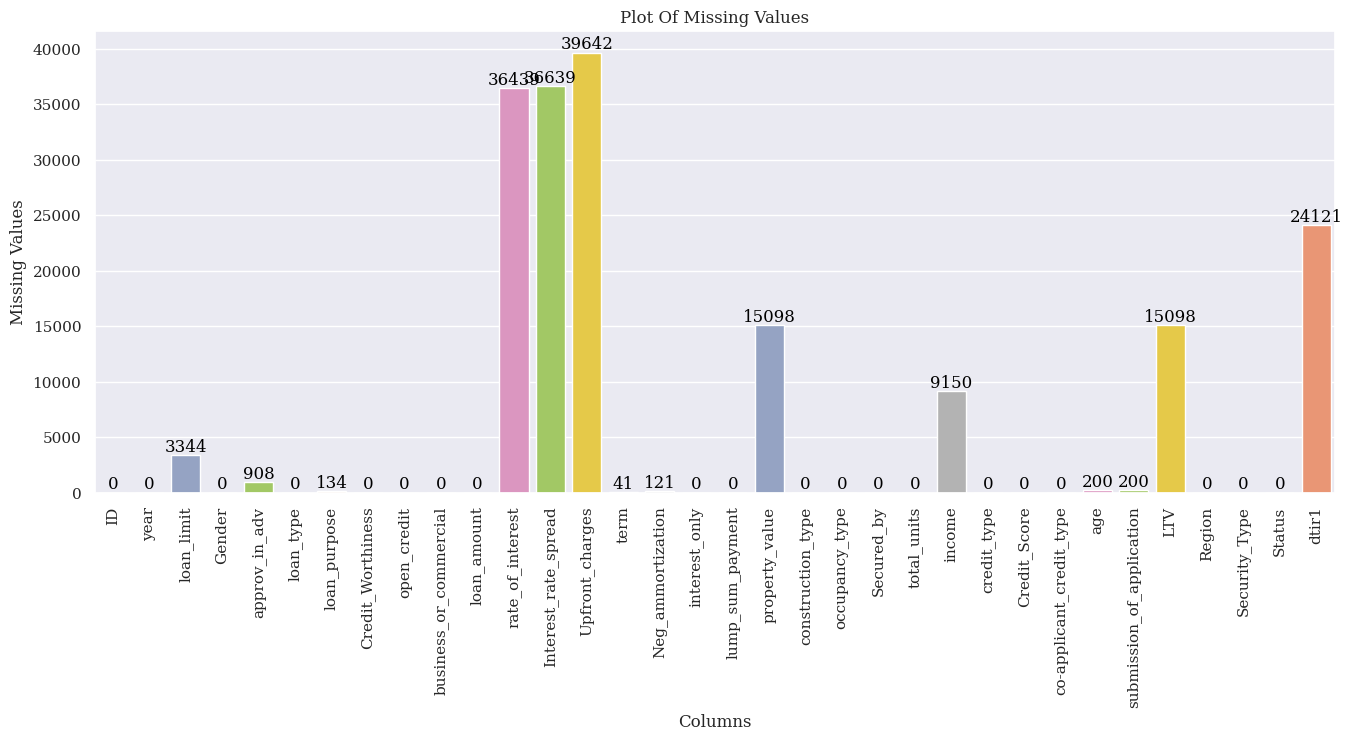

In [54]:
plot_missing_values(df, height=0.1)

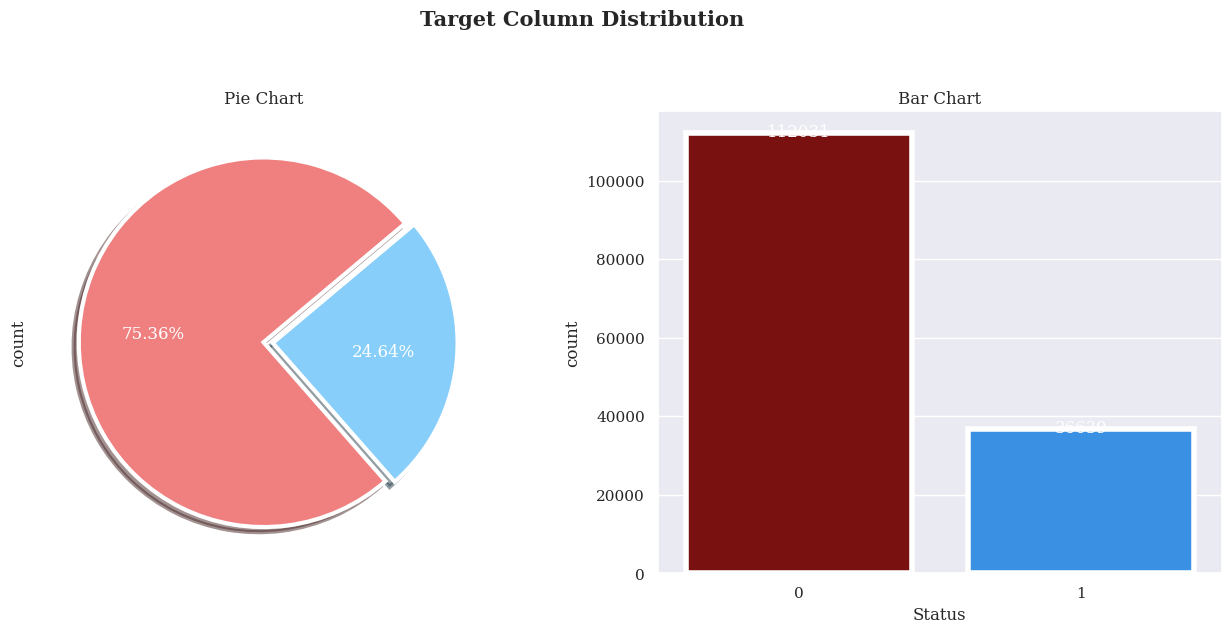

In [55]:
plot_target_column(df ,'Status')

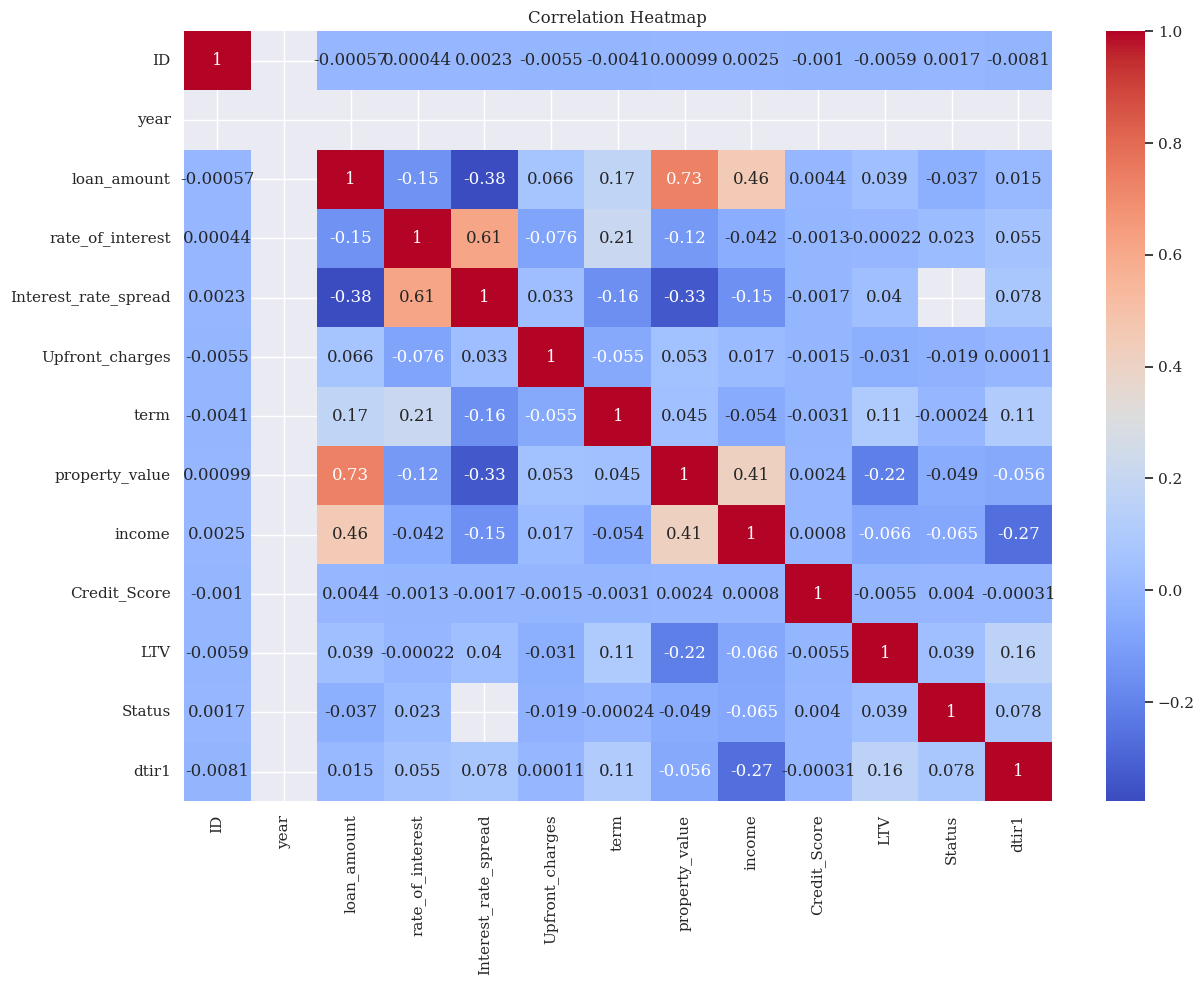

In [56]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), cmap="coolwarm", annot=True)
plt.title("Correlation Heatmap")
plt.show()

In [58]:
# Assuming 'df' is your DataFrame
corr_matrix = df.select_dtypes(include=[np.number]).corr()

# Print the correlation matrix
print(corr_matrix)

                            ID  year  loan_amount  rate_of_interest  \
ID                    1.000000   NaN    -0.000566          0.000442   
year                       NaN   NaN          NaN               NaN   
loan_amount          -0.000566   NaN     1.000000         -0.150844   
rate_of_interest      0.000442   NaN    -0.150844          1.000000   
Interest_rate_spread  0.002338   NaN    -0.377272          0.614908   
Upfront_charges      -0.005507   NaN     0.065556         -0.076473   
term                 -0.004056   NaN     0.174474          0.209330   
property_value        0.000990   NaN     0.734249         -0.122613   
income                0.002535   NaN     0.456065         -0.041809   
Credit_Score         -0.001036   NaN     0.004438         -0.001331   
LTV                  -0.005853   NaN     0.038869         -0.000220   
Status                0.001703   NaN    -0.036825          0.022957   
dtir1                -0.008132   NaN     0.015029          0.055124   

     

In [60]:
columns_to_drop = ['ID', 'year', 'term', 'Interest_rate_spread', 'property_value', 'submission_of_application']
df.drop(columns=columns_to_drop, inplace=True)


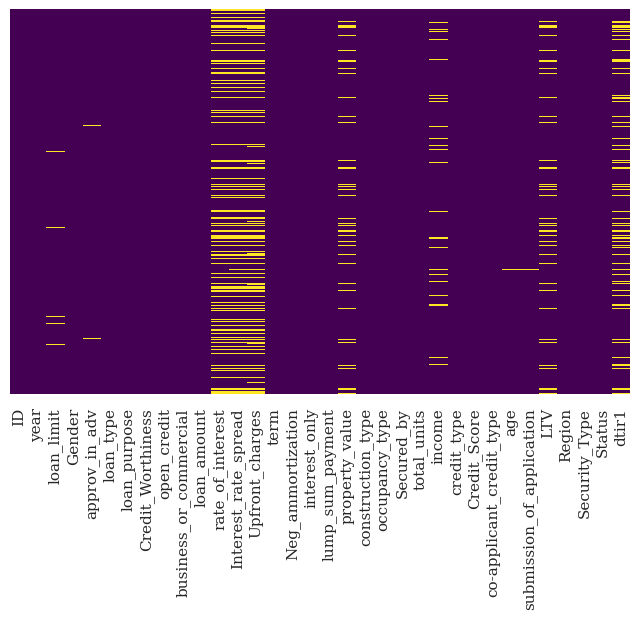

In [59]:
# Create a heatmap to visualize missing values
plt.figure(figsize=(8, 5))  # Set the figure size
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

# Show the plot
plt.show()

In [62]:
def fill_missing_values(df):
    numeric_cols = df.select_dtypes(include=['float64', 'int64'])
    non_numeric_cols = df.select_dtypes(exclude=['float64', 'int64'])

    # Fill missing values in numeric columns with the mean
    df[numeric_cols.columns] = df[numeric_cols.columns].fillna(numeric_cols.mean())

    # Fill missing values in non-numeric columns with the mode
    df[non_numeric_cols.columns] = df[non_numeric_cols.columns].fillna(non_numeric_cols.mode().iloc[0])

    return df

In [63]:
df = fill_missing_values(df)

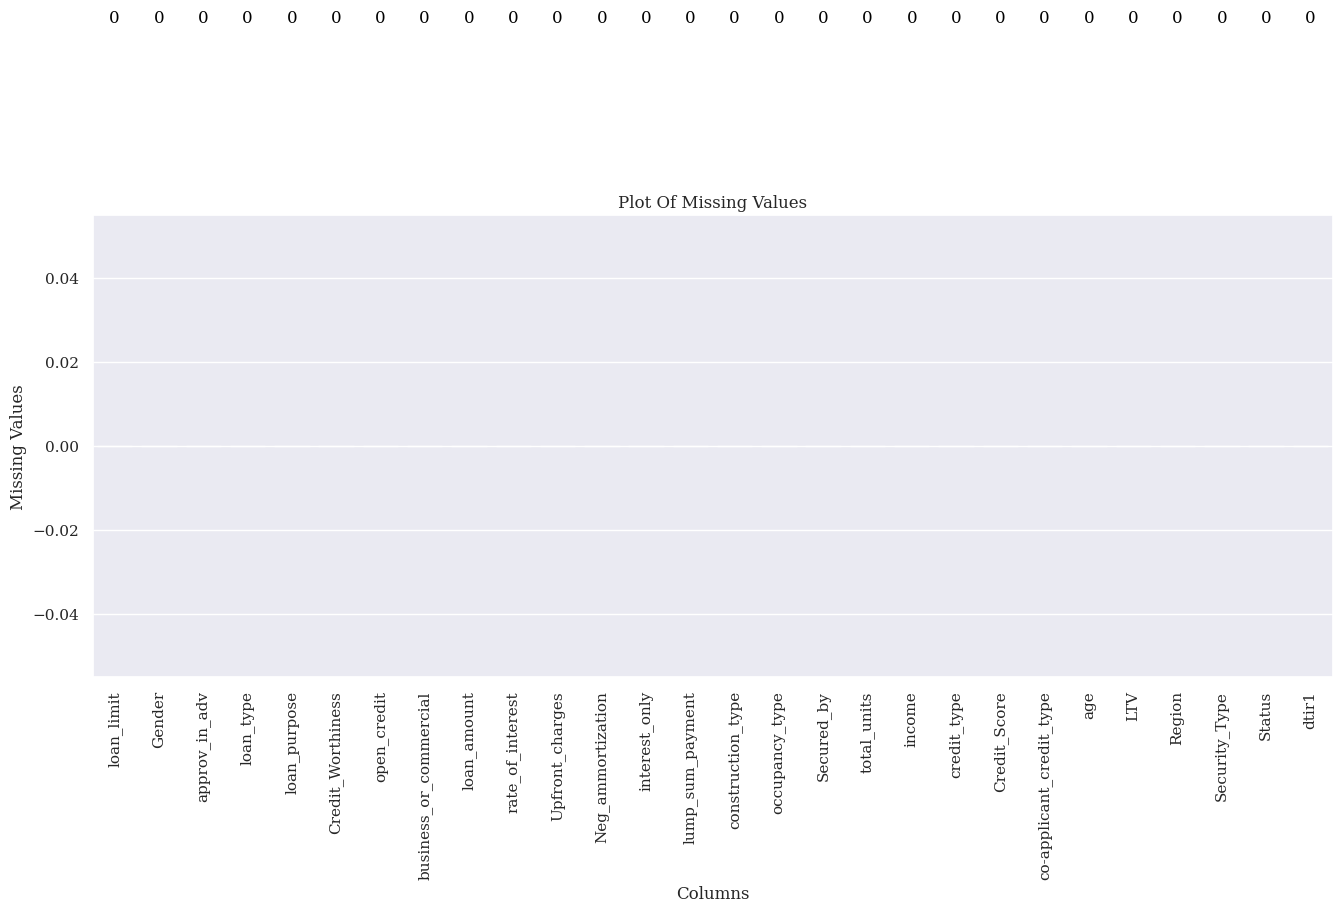

In [64]:
plot_missing_values(df, height=0.1)

<Figure size 1800x2400 with 0 Axes>

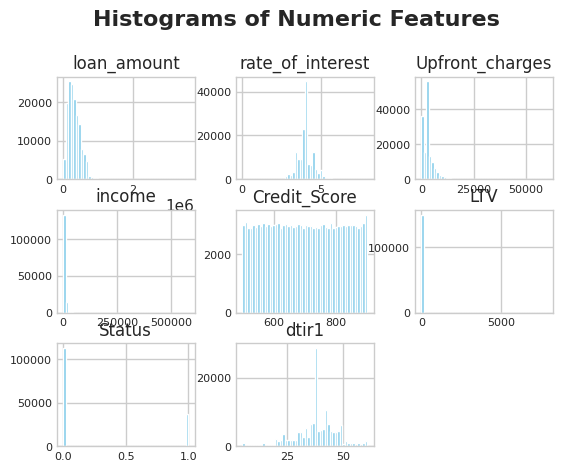

In [65]:
# Set a larger figure size and style
plt.figure(figsize=(18, 24))
plt.style.use('seaborn-whitegrid')

# Create histograms with a single color
df.hist(bins=50, xlabelsize=8, ylabelsize=8, color='skyblue')

# Add titles to subplots
plt.suptitle("Histograms of Numeric Features", y=1.02, size=16, weight='bold')

# Show the histograms
plt.show()

In [66]:
df['Gender'].replace(['Sex Not Available'],df['Gender'].mode(),inplace=True)

In [78]:
df.to_csv('Preprocessed Data')

In [67]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Instantiate label encoder
le = LabelEncoder()

# Apply label encoding to each categorical column
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [74]:
# Set the target attribute 'Status'
Y = df['Status']

# Define the feature attributes (excluding 'Status')
X = df.drop('Status', axis='columns')

In [75]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=True)

In [76]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [77]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [78]:
y_pred_knn = knn.predict(X_test)

In [79]:
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print(f"K-Nearest Neighbors Accuracy: {knn_accuracy * 100:.2f}%")

K-Nearest Neighbors Accuracy: 92.44%


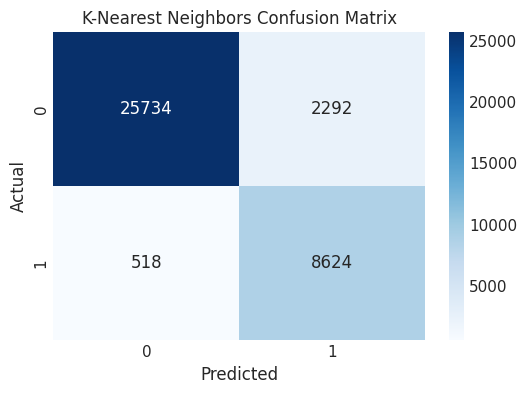

In [80]:
knn_confusion = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(6, 4))
sns.heatmap(knn_confusion, annot=True, fmt='d', cmap='Blues')
plt.title('K-Nearest Neighbors Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()